<a href="https://colab.research.google.com/github/Abhay182005dat/My_TensorFlow_Learning/blob/main/Dropouts_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Generate Data

In [32]:
X_train = np.linspace(-1,1,20)

In [33]:
y_train= np.array([-0.6561,-0.3099,-0.59035,-0.50855,-0.285,
                   -0.2443,-0.02445, 0.00135, -0.2006, 0.07475,
                   -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                   0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [34]:
X_test = np.linspace(-1,1,20)

In [35]:
y_test = np.array([-0.69415, -0.451,-0.43005,-0.4484,-0.1475,
                   -0.5019,-0.28055, 0.24595,-0.21425,-0.0286,
                   0.23415,0.46575,0.07955,0.1973,0.0719,
                   0.3639, 0.5536, 0.3365 , 0.50705,0.33435])

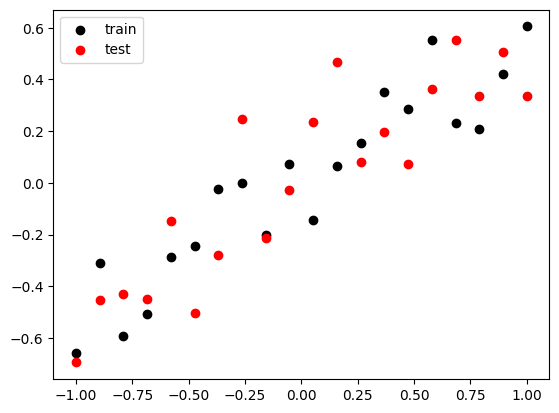

In [36]:
plt.scatter(X_train,y_train,c='black',label="train")
plt.scatter(X_test,y_test,c='red',label="test")
plt.legend()
plt.show()

### Regression model

In [ ]:
model = Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

adam = Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history = model.fit(X_train , y_train , epochs = 500 , validation_data = (X_test,y_test),verbose = False)

In [ ]:
# evaluate the model
_ , train_mse = model.evaluate(X_train, y_train, verbose=0)
_ , test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test : {}'.format(train_mse , test_mse))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='train' )
plt.scatter(X_test,y_test,c='red',label='test')
plt.scatter(X_test,y_pred,c='blue',label='prediction')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

> We can see the blue line is being very close to the black lines form which we can infer that our model is overfitting


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


### Using Droput model

In [ ]:
model = Sequential()
model.add(Dense (128, input_dim=1, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense (128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense (1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer = adam, metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [ ]:
# evaluate the model
_ , train_mse = model.evaluate(X_train, y_train, verbose=0)
_ , test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test : {}'.format(train_mse , test_mse))

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='train' )
plt.scatter(X_test,y_test,c='red',label='test')
plt.scatter(X_test,y_pred,c='blue',label='prediction')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

> We can see that curve has been smoothened and some black points have been ignored ,specifying that overfittig has been reduced.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
